In [1]:
import pyvo

tap = pyvo.dal.TAPService('https://datalab.noirlab.edu/tap')

In [2]:
count = tap.run_sync('select count(*) from des_dr2.main WHERE ra > 60 AND ra < 61 AND dec < -35 AND dec > -36')

In [3]:
count

<Table length=1>
COUNT 
int64 
------
116580

In [4]:
count = tap.run_sync('select count(*) from ls_dr9.tractor WHERE ra > 60 AND ra < 61 AND dec < -35 AND dec > -36')

In [5]:
count

<Table length=1>
COUNT 
int64 
------
134627

In [35]:
count = tap.run_sync("select count(*) from ls_dr9.tractor WHERE ra > 60.7 AND ra < 61 AND dec < -35.7 AND dec > -36 AND type = 'PSF'")

In [36]:
count

<Table length=1>
COUNT
int64
-----
 4584

In [48]:
result = tap.run_sync("select * from ls_dr9.tractor WHERE ra > 60.5 AND ra < 61 AND dec < -35.5 AND dec > -36 AND type = 'PSF' AND snr_r > 10")

In [49]:
len(result)

3231

In [50]:
result

<Table length=3231>
        glat             ls_id               dec         ... type wise_coadd_id
                                                         ...                   
      float64            int64             float64       ... str4      str8    
------------------- ---------------- ------------------- ... ---- -------------
 -48.85877194720281 9906608708258836  -35.99391263609836 ...  PSF      0596m364
-48.854342182911004 9906608708258995 -35.991500939921586 ...  PSF      0596m364
 -48.86336111317631 9906608708258639  -35.97817346807138 ...  PSF      0596m364
 -48.85761054993074 9906608708258865  -35.97943783030094 ...  PSF      0596m364
 -48.85957955328576 9906608708258786  -35.97694198156744 ...  PSF      0596m364
 -48.85199796627719 9906608708259088  -35.99848248118078 ...  PSF      0596m364
 -48.84913163734985 9906608708259182  -35.98532517115388 ...  PSF      0596m364
 -48.84632316639214 9906608708259291  -35.98766195481038 ...  PSF      0596m364
 -48.84644400824747 

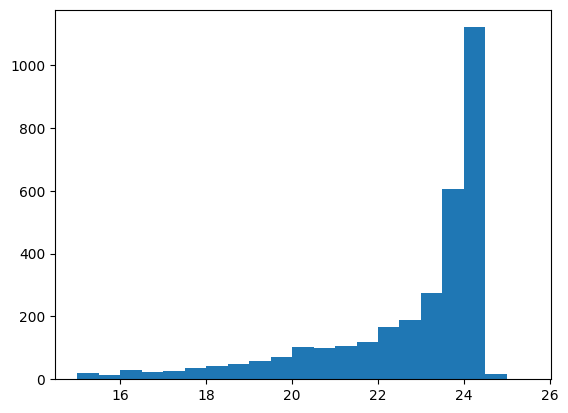

In [109]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(15, 26, 0.5)
counts_decals, _, __ = plt.hist(result['mag_r'], bins)

In [54]:
from lsst.rsp import get_tap_service

service = get_tap_service()


In [59]:
query = "SELECT * " + \
        "FROM dp02_dc2_catalogs.TruthSummary " + \
        "WHERE ra > 60.5 AND ra < 61 AND dec < -35.5 AND dec > -36 AND truth_type = 2"
dp0 = service.search(query).to_table()

In [114]:
len(dp0)

2600

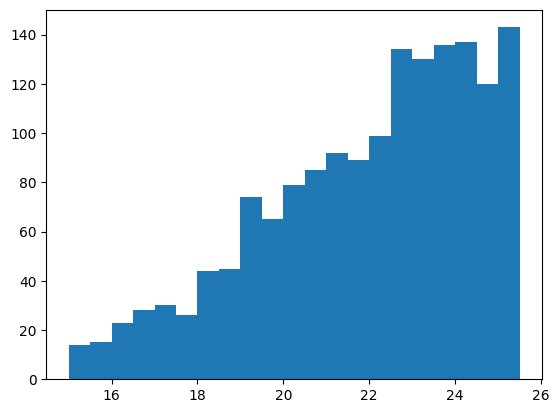

In [110]:
counts_dp0, _, __ = plt.hist(dp0['mag_r'], bins)

In [99]:
print(np.max(dp0['mag_r']))
print(np.min(dp0['mag_r']))

28.188
9.22715


22
21


Text(0.5, 1.0, '60.5 < ra < 61, -36 < dec < -35.5')

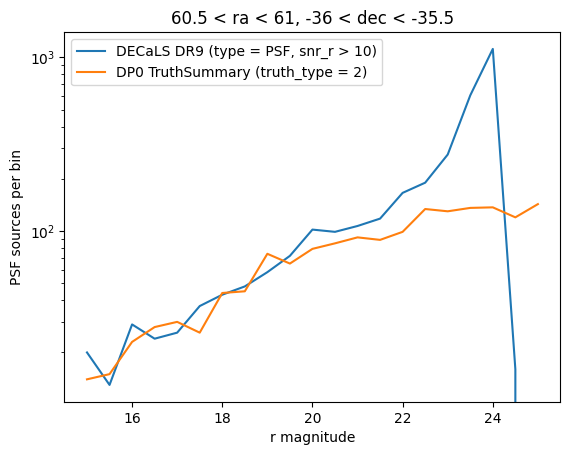

In [113]:
print(len(bins))
print(len(counts_decals))
plt.plot(bins[:-1], counts_decals, label='DECaLS DR9 (type = PSF, snr_r > 10)')
plt.plot(bins[:-1], counts_dp0, label='DP0 TruthSummary (truth_type = 2)')
plt.xlabel('r magnitude')
plt.ylabel('PSF sources per bin')
ax = plt.gca()
ax.legend()
plt.yscale('log')
plt.title('60.5 < ra < 61, -36 < dec < -35.5')

In [126]:
use_center_coords = '60.75, -35.75'

my_adql_query = "SELECT * "+ \
                "FROM dp02_dc2_catalogs.TruthSummary " + \
                "WHERE CONTAINS(POINT('ICRS', ra, dec), " + \
                "CIRCLE('ICRS', " + use_center_coords + ", 0.3536)) = 1 AND truth_type = 2"



In [127]:
my_adql_query

"SELECT * FROM dp02_dc2_catalogs.TruthSummary WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 60.75, -35.75, 0.3536)) = 1 AND truth_type = 2"

In [128]:
cone = service.search(my_adql_query).to_table()

In [129]:
len(cone)

5071